# Libraries Loading

In [4]:
import pandas as pd
import os
import numpy as np

In [44]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 4.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install -U kaleido

  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl.metadata (15 kB)
Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 449.6 kB/s eta 0:00:000:0100:01
Note: you may need to restart the kernel to use updated packages.


# Data Loading 

In [5]:
import os
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Define the directory where the data files are stored
data_dir = "Dataset"

# Create a function to load and process the data for a given year
def load_and_process_data(year, data_dir):
    # Initialize an empty dataframe to store the data for the specific year
    data = pd.DataFrame()

    # Get the list of files for the specified year
    year_folder = str(year)

    files = os.listdir(os.path.join(data_dir, year_folder))
    
    # Load data from each file in the folder
    for filename in files:
        if filename.endswith(".csv"):
            # Read the CSV file
            df = pd.read_csv(os.path.join(data_dir, year_folder, filename))
            
            # Add 'Year' and 'CropType' to the dataframe
            base_name = filename.split('.')[0]
            croptype = base_name.rsplit('202', 1)[0]  # Assuming the 'CropType' is before '202'
            df['Year'] = year
            df['CropType'] = croptype
            
            # Append to the main dataframe
            data = pd.concat([data, df], ignore_index=True)
    

    return data


In [6]:
# Process data for 2021, 2022, and 2023
data_2021 = load_and_process_data(2021, data_dir)

data_2022 = load_and_process_data(2022, data_dir)

data_2023 = load_and_process_data(2023, data_dir)



print("Data processing complete")

Data processing complete


# Printing each year dataset

In [7]:
data_2021.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628,2021,cotton
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792,2021,cotton
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118,2021,cotton
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681,2021,cotton
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931,2021,cotton


In [8]:
data_2022.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.088053,0.122912,0.203632,0.413183,0.824614,-0.012009,0.707493,0.553634,0.678005,0.601276,0.558074,0.264170,2022,cotton
1,0.153362,0.306787,0.199341,0.344232,0.565855,-0.013706,0.512479,0.383124,0.508259,0.485459,0.426386,0.201609,2022,cotton
2,0.106067,0.140156,0.328443,0.432596,0.567783,0.049462,0.738598,0.613374,0.881896,0.774641,0.718519,0.608508,2022,cotton
3,0.091542,0.120096,0.244057,0.370085,0.502907,0.016404,0.617543,0.638213,0.856499,0.782228,0.730698,0.588019,2022,cotton
4,0.080412,0.116872,0.291829,0.427347,0.688564,0.012112,0.517153,0.594714,0.845494,0.772517,0.730694,0.628959,2022,cotton


In [9]:
data_2023.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType
0,0.112304,0.168831,0.357419,0.652470,0.511220,0.071754,0.746601,0.714075,0.747262,0.729675,0.634746,0.199640,2023,cotton
1,0.111033,0.149460,0.360941,0.404814,0.385993,0.089474,0.647436,0.637131,0.677606,0.663667,0.581217,0.438363,2023,cotton
2,0.102703,0.226310,0.554877,0.790602,0.812145,0.090364,0.866772,0.787777,0.838983,0.784251,0.711433,0.869757,2023,cotton
3,0.090742,0.079962,0.355833,0.864751,0.837066,0.149301,0.890619,0.795135,0.834237,0.774393,0.683996,0.840936,2023,cotton
4,0.100312,0.077954,0.328019,0.697031,0.722988,0.242764,0.869281,0.811822,0.836173,0.802686,0.700463,0.848245,2023,cotton


# One-Hot Encoding and Label Encoding

To train machine learning models, we need to convert string and categorical data into numerical values, as computers cannot understand non-numeric data. There are two common techniques for converting categorical data into numbers:

## 1. One-Hot Encoding
One-Hot Encoding is used when the categories are **nominal** (i.e., there is no meaningful order between them). This method creates new binary columns, where each column represents a category. For example, if a column contains "Yes" and "No", One-Hot Encoding will create two columns, one for "Yes" and one for "No", with binary values (0 or              |

## 2. Label Encoding
Label Encoding is used when the categories are **ordinal** (i.e., there is a meaningful order between them). This method assigns a unique integer to each category ba

s
In our case the feature is yes or no use **One hot encoding**ot Encoding** will be used.
ne hot encoding

In [10]:

def encode_values(data):
    data = pd.get_dummies(data,columns=['CropType'], drop_first=True)
    data["CropType_rice"]=data["CropType_rice"].astype(int)
    return data
    

In [11]:
data_2021=encode_values(data_2021)
data_2022=encode_values(data_2022)
data_2023=encode_values(data_2023)

# Data Imbalance

In [12]:
class_balance = data_2021["CropType_rice"].value_counts()

class_balance


CropType_rice
0    2883
1     419
Name: count, dtype: int64

CropType_rice
0    2883
1     419
Name: count, dtype: int64


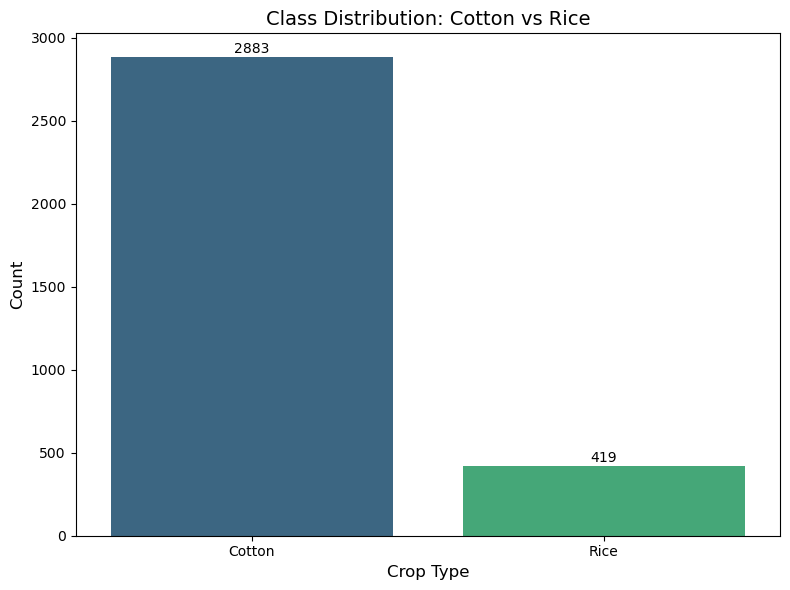

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the class balance
class_balance = data_2021["CropType_rice"].value_counts()
print(class_balance)

# Define class labels
class_labels = {0: 'Cotton', 1: 'Rice'}

# Create a bar plot for class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_balance.index, y=class_balance.values, palette="viridis")

# Add labels and title
plt.xticks(ticks=[0, 1], labels=['Cotton', 'Rice'])
plt.title("Class Distribution: Cotton vs Rice", fontsize=14)
plt.xlabel("Crop Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Annotate the bars with the class count
for i, count in enumerate(class_balance.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


CropType_rice
0    12411
1     4687
Name: count, dtype: int64


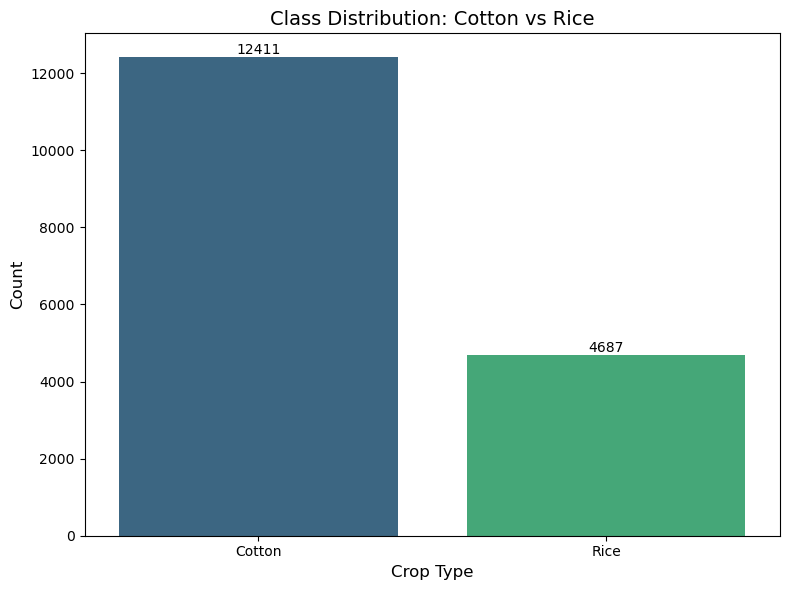

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

# Check the class balance
class_balance = data_2022["CropType_rice"].value_counts()
print(class_balance)

# Define class labels
class_labels = {0: 'Cotton', 1: 'Rice'}

# Create a bar plot for class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_balance.index, y=class_balance.values, palette="viridis")

# Add labels and title
plt.xticks(ticks=[0, 1], labels=['Cotton', 'Rice'])
plt.title("Class Distribution: Cotton vs Rice", fontsize=14)
plt.xlabel("Crop Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Annotate the bars with the class count
for i, count in enumerate(class_balance.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


CropType_rice
0    11777
1      919
Name: count, dtype: int64


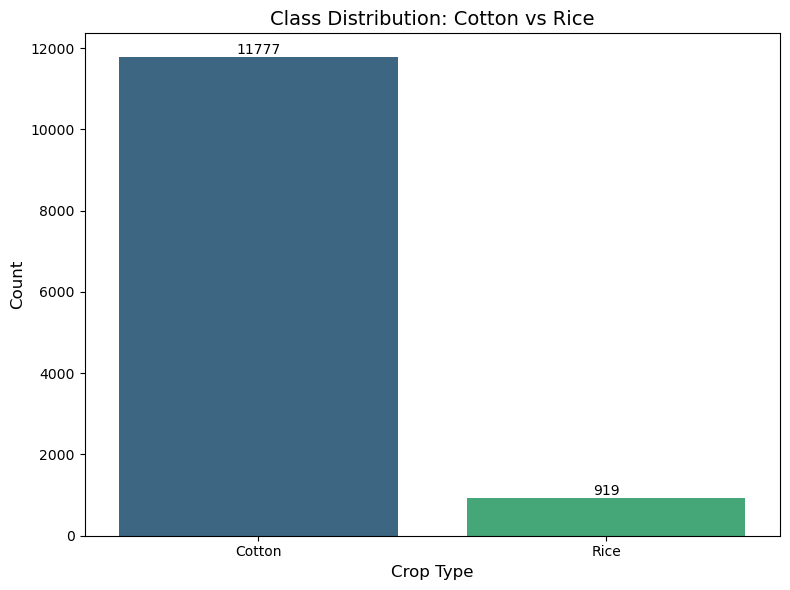

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the class balance
class_balance = data_2023["CropType_rice"].value_counts()
print(class_balance)

# Define class labels
class_labels = {0: 'Cotton', 1: 'Rice'}

# Create a bar plot for class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_balance.index, y=class_balance.values, palette="viridis")

# Add labels and title
plt.xticks(ticks=[0, 1], labels=['Cotton', 'Rice'])
plt.title("Class Distribution: Cotton vs Rice", fontsize=14)
plt.xlabel("Crop Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Annotate the bars with the class count
for i, count in enumerate(class_balance.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


# Mitigating Imbalance

To handle data imbalance, three popular techniques are oversampling, undersampling, and SMOTE. 
**Oversampling** 

increases the minority class samples by duplicating or creating new ones, ensuring all classes have equal representation, but it can lead to overfitting. 

**Undersampling**

reduces the majority class by randomly removing samples, balancing the dataset but risking loss of valuable information.

**SMOTE** 

(Synthetic Minority Oversampling Technique) generates synthetic samples for the minority class by interpolating between existing samples, maintaining the dataset's diversity while balancing it. These methods are chosen based on the dataset size, model sensitivity, and the need to preserve data characteristics. SMOTE is often preferred for its ability to avoid duplication and maintain meaningful synthetic patterns.
Resampling Should Be Done Before Scaling
Resampling Techniques:

In [16]:
from imblearn.over_sampling import SMOTENC

def apply_smote_nc(data, target_column, categorical_columns, random_state=42):
    """
    Applies SMOTENC to handle imbalanced data with mixed numeric and categorical features.
    """
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Identify categorical column indices
    categorical_features = [X.columns.get_loc(col) for col in categorical_columns]
    
    # Apply SMOTENC
    smote_nc = SMOTENC(categorical_features=categorical_features, random_state=random_state)
    X_smote, y_smote = smote_nc.fit_resample(X, y)
    
    # Combine resampled features and target into a new DataFrame
    smote_data = pd.DataFrame(X_smote, columns=X.columns)
    smote_data[target_column] = y_smote
    
    return smote_data



In [17]:
smote_data_2021 = apply_smote_nc(data_2021, target_column="CropType_rice", categorical_columns=["Year"])

smote_data_2022 = apply_smote_nc(data_2022, target_column="CropType_rice", categorical_columns=["Year"])

smote_data_2023 = apply_smote_nc(data_2023, target_column="CropType_rice", categorical_columns=["Year"])



# Balanced Dataset

CropType_rice
0    2883
1    2883
Name: count, dtype: int64


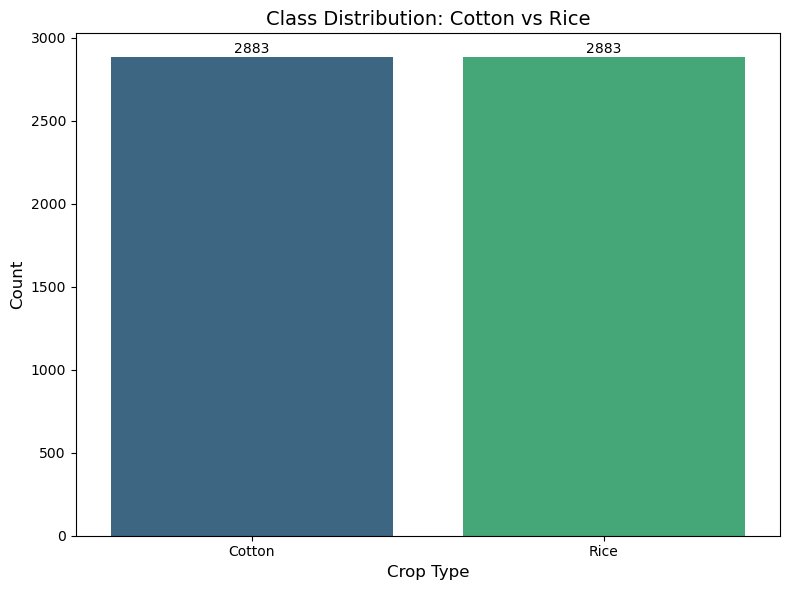

In [18]:
class_balance = smote_data_2021["CropType_rice"].value_counts()

class_balance

import matplotlib.pyplot as plt
import seaborn as sns

# Check the class balance
class_balance = smote_data_2021["CropType_rice"].value_counts()
print(class_balance)

# Define class labels
class_labels = {0: 'Cotton', 1: 'Rice'}

# Create a bar plot for class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_balance.index, y=class_balance.values, palette="viridis")

# Add labels and title
plt.xticks(ticks=[0, 1], labels=['Cotton', 'Rice'])
plt.title("Class Distribution: Cotton vs Rice", fontsize=14)
plt.xlabel("Crop Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Annotate the bars with the class count
for i, count in enumerate(class_balance.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


CropType_rice
0    12411
1    12411
Name: count, dtype: int64


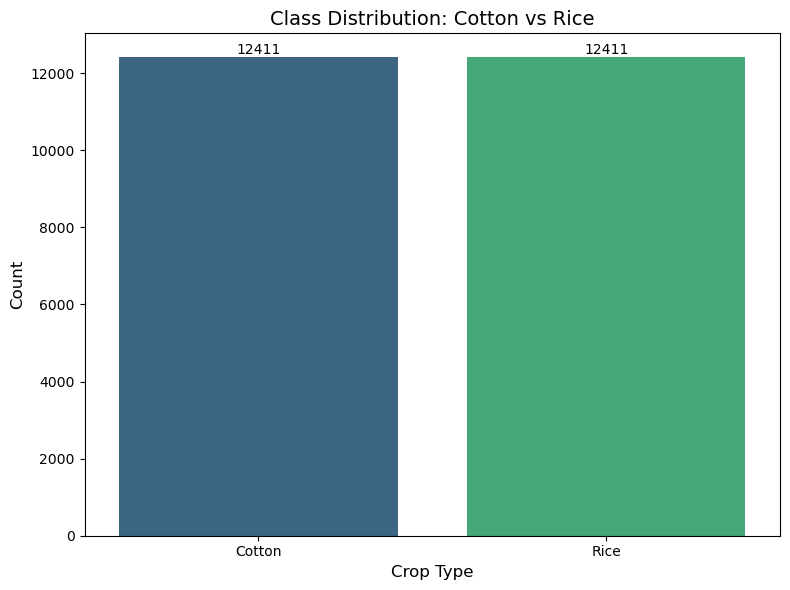

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the class balance
class_balance = smote_data_2022["CropType_rice"].value_counts()
print(class_balance)

# Define class labels
class_labels = {0: 'Cotton', 1: 'Rice'}

# Create a bar plot for class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_balance.index, y=class_balance.values, palette="viridis")

# Add labels and title
plt.xticks(ticks=[0, 1], labels=['Cotton', 'Rice'])
plt.title("Class Distribution: Cotton vs Rice", fontsize=14)
plt.xlabel("Crop Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Annotate the bars with the class count
for i, count in enumerate(class_balance.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


CropType_rice
0    11777
1    11777
Name: count, dtype: int64


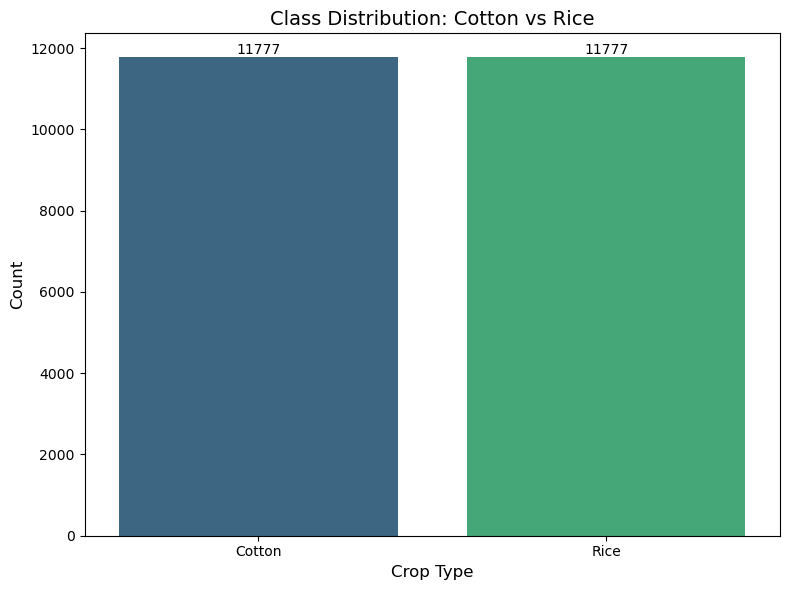

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the class balance
class_balance = smote_data_2023["CropType_rice"].value_counts()
print(class_balance)

# Define class labels
class_labels = {0: 'Cotton', 1: 'Rice'}

# Create a bar plot for class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_balance.index, y=class_balance.values, palette="viridis")

# Add labels and title
plt.xticks(ticks=[0, 1], labels=['Cotton', 'Rice'])
plt.title("Class Distribution: Cotton vs Rice", fontsize=14)
plt.xlabel("Crop Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Annotate the bars with the class count
for i, count in enumerate(class_balance.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


# Merging all Dataframes

In [35]:
data_train = pd.concat([smote_data_2021, smote_data_2022, smote_data_2023], ignore_index=True)

# Remove Duplicate Numbers

In [36]:
data_train = data_train.drop_duplicates(ignore_index=True)


# Printing Data

In [37]:
data_train.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628,2021,0
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792,2021,0
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118,2021,0
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681,2021,0
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931,2021,0


In [38]:
class_balance = data_train["CropType_rice"].value_counts()

class_balance

CropType_rice
1    27055
0    26469
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the class balance
class_balance = data_train["CropType_rice"].value_counts()
print(class_balance)

# Define class labels
class_labels = {0: 'Cotton', 1: 'Rice'}

# Create a bar plot for class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_balance.index, y=class_balance.values, palette="viridis")

# Add labels and title
plt.xticks(ticks=[0, 1], labels=['Cotton', 'Rice'])
plt.title("Class Distribution: Cotton vs Rice", fontsize=14)
plt.xlabel("Crop Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Annotate the bars with the class count
for i, count in enumerate(class_balance.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [39]:
data_test = pd.concat([data_2021, data_2022, data_2023], ignore_index=True)


In [40]:
data_test.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.153184,0.222615,0.498528,0.611280,0.285032,0.112775,0.529626,0.546617,0.604374,0.571359,0.620985,0.496628,2021,0
1,0.137897,0.106036,0.169626,0.330396,0.594655,0.227967,0.578199,0.661604,0.783454,0.777313,0.729177,0.636792,2021,0
2,0.122481,0.088123,0.182121,0.376037,0.431042,0.350422,0.630027,0.724557,0.844643,0.673307,0.736385,0.635118,2021,0
3,0.085279,0.091887,0.140729,0.243528,0.224835,0.046875,0.579180,0.666857,0.611009,0.625423,0.612167,0.208681,2021,0
4,0.091678,0.094313,0.247900,0.367800,0.546883,0.476697,0.699308,0.768818,0.753445,0.711491,0.707040,0.647931,2021,0


# Outlier Removal Using Z score
The **Z-score** (also known as the standard score) is a statistical measure that describes the relationship of a data point to the mean of a group of data. Here are **two linear importance points** of Z-scores:

---

### 1. **Standardizing Data for Comparisons**  
The Z-score standardizes data by converting values to a common scale with a mean of **0** and a standard deviation of **1**. This is especially important in linear comparisons or **linear models** (e.g., regression) where features may have different units or ranges.  
- **Why it's important**: Standardized data helps in ensuring that all variables contribute equally to the model without being biased by their original scales.

**Formula:**  
\[
Z = \frac{X - \mu}{\sigma}
\]  
where \(X\) = data point, \(\mu\) = mean, and \(\sigma\) = standard deviation.

---

### 2. **Outlier Detection in Linear Models**  
Z-scores help identify outliers, which are extreme data points that can skew the results of linear models (e.g., linear regression). Typically, a Z-score above **+3** or below **-3** is considered an outlier.  
- **Why it's important**: Removing or analyzing outliers helps improve the accuracy and reliability of linear models by ensuring that extreme values do not distort model predictions.

---

These two aspects make Z-scores a powerful tool for **data preprocessing**, standardization, and outlier detection in linear models or analyses.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers_zscore(df, columns=None, threshold=3):
    """
    Remove outliers from a DataFrame using the Z-Score method.
    Rows where any numeric column Z-Score > threshold (default=3) are removed.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        columns (list): List of columns to apply Z-Score filtering. If None, numeric columns are selected.
        threshold (float): Z-Score threshold for outlier detection.
    
    Returns:
        pd.DataFrame: Cleaned DataFrame without outliers.
    """
    # Automatically select numeric columns if 'columns' is not specified
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Calculate Z-Score only for the specified columns
    z_scores = (df[columns] - df[columns].mean()) / df[columns].std()

    # Filter rows where all Z-Scores are within the threshold
    cleaned_df = df[(np.abs(z_scores) <= threshold).all(axis=1)]

    return cleaned_df

# Select NDVI columns
ndvi_columns = [f"NDVI{str(i).zfill(2)}" for i in range(1, 13)]  # NDVI01 to NDVI12

# Boxplot Before Outlier Removal
plt.figure(figsize=(14, 6))
plt.title("NDVI Values Before Outlier Removal")
sns.boxplot(data=data_train[ndvi_columns])
plt.xticks(rotation=45)
plt.show()

# Remove outliers only from NDVI columns
cleaned_data = remove_outliers_zscore(data_train, columns=ndvi_columns, threshold=3)

# Boxplot After Outlier Removal
plt.figure(figsize=(14, 6))
plt.title("NDVI Values After Outlier Removal")
sns.boxplot(data=cleaned_data[ndvi_columns])
plt.xticks(rotation=45)
plt.show()

# Display results
print("Original Dataset Shape:", data_train.shape)
print("Cleaned Dataset Shape (without outliers):", cleaned_data.shape)

# Save the cleaned data
cleaned_data.to_csv("cleaned_data.csv", index=False)


# Scaling Using MinMax 
**Reason**
1. **Preserves the Linear Relationships Between Features**
Min-Max Scaling linearly transforms the data to a specific range (e.g., 0 to 1). It maintains the relative distances and proportions between the original values, ensuring that linear relationships among features remain intact.

For example, if one feature is twice the size of another before scaling, it will still hold true after Min-Max Scaling.

2. **Improves Performance of Machine Learning Models**
Many machine learning algorithms (like SVMs, k-NN, or gradient-based models) are sensitive to the scale of the data. Min-Max Scaling ensures that all features contribute equally by bringing them to a common range. This avoids dominance by features with larger values and helps improve model convergence speed and accuracy.

In [42]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

def apply_scaling(df, exclude_columns=["CropType_rice", "Year"], scaler_type="standard"):
    """
    Function to apply different scaling techniques on numerical columns in the dataframe.
    """
    # Identify columns to scale (exclude target and categorical columns)
    columns_to_scale = [col for col in df.columns if col not in exclude_columns]
    
    # Initialize the appropriate scaler
    if scaler_type == "standard":
        scaler = StandardScaler()
    elif scaler_type == "minmax":
        scaler = MinMaxScaler()
    elif scaler_type == "robust":
        scaler = RobustScaler()
    elif scaler_type == "quantile":
        scaler = QuantileTransformer()
    else:
        raise ValueError("Invalid scaler type. Choose from ['standard', 'minmax', 'robust', 'quantile'].")
    
    # Apply the scaler
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    df_scaled["Year"] = df["Year"]  # Retain Year column
    df_scaled["CropType_rice"] = df["CropType_rice"]  # Retain target column
    
    return df_scaled

# Apply scaling to the cleaned data
data_train = apply_scaling(cleaned_data, scaler_type="minmax")

# Save the scaled data
data_train.to_csv("final/data_train.csv", index=False)

# Visualization of scaling
ndvi_columns = [f"NDVI{str(i).zfill(2)}" for i in range(1, 13)]  # Columns NDVI01 to NDVI12

# Plot before and after scaling (using boxplots)
plt.figure(figsize=(16, 8))

# Before scaling
plt.subplot(1, 2, 1)
plt.title("Before Scaling")
sns.boxplot(data=cleaned_data[ndvi_columns])
plt.xticks(rotation=45)

# After scaling
plt.subplot(1, 2, 2)
plt.title("After Min-Max Scaling")
sns.boxplot(data=data_train[ndvi_columns])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Histogram comparison for one column as an example
plt.figure(figsize=(12, 6))

column_example = "NDVI01"  # Choose a column to visualize before and after scaling
plt.hist(cleaned_data[column_example], bins=30, alpha=0.5, label="Before Scaling", color='red')
plt.hist(data_train[column_example], bins=30, alpha=0.5, label="After Scaling", color='blue')

plt.title(f"Histogram Comparison: {column_example}")
plt.xlabel(column_example)
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Summary of scaling effect
print("Original Dataset Shape:", cleaned_data.shape)
print("Scaled Dataset Shape:", data_train.shape)



# Saved Cleaned File/


In [43]:
data_train=apply_scaling(cleaned_data,scaler_type="minmax")
data_train.to_csv("/home/tukl/Desktop/ML/final/data_train.csv", index=False)


In [44]:
data_train.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.257964,0.291988,0.497512,0.602937,0.301105,0.366307,0.533685,0.553436,0.571190,0.538821,0.597418,0.456637,2021,0
1,0.235887,0.142096,0.167945,0.316026,0.603767,0.448582,0.581839,0.666694,0.765290,0.760409,0.712338,0.607937,2021,0
2,0.213624,0.119064,0.180465,0.362646,0.443832,0.536044,0.633219,0.728700,0.831612,0.648508,0.719994,0.606130,2021,0
3,0.159902,0.123904,0.138990,0.227293,0.242261,0.319238,0.582811,0.671868,0.578382,0.596989,0.588052,0.145814,2021,0
4,0.169143,0.127024,0.246378,0.354233,0.557069,0.626235,0.701903,0.772296,0.732765,0.689591,0.688824,0.619960,2021,0


In [45]:
data_test=apply_scaling(data_test,scaler_type="minmax")

In [46]:
data_test.head()

,NDVI01,NDVI02,NDVI03,NDVI04,NDVI05,NDVI06,NDVI07,NDVI08,NDVI09,NDVI10,NDVI11,NDVI12,Year,CropType_rice
0,0.174199,0.226081,0.497512,0.602937,0.301105,0.366307,0.533685,0.573747,0.597158,0.554505,0.607815,0.464183,2021,0
1,0.159291,0.110022,0.167945,0.316026,0.603767,0.448582,0.581839,0.681854,0.779504,0.768558,0.719766,0.613382,2021,0
2,0.144257,0.092189,0.180465,0.362646,0.443832,0.536044,0.633219,0.741039,0.841810,0.660462,0.727225,0.611600,2021,0
3,0.107979,0.095937,0.138990,0.227293,0.242261,0.319238,0.582811,0.686792,0.603915,0.610695,0.598690,0.157676,2021,0
4,0.114219,0.098352,0.246378,0.354233,0.557069,0.626235,0.701903,0.782652,0.748949,0.700148,0.696860,0.625238,2021,0


# Applying Machine Learning Models to All three datasets

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import re
import os
import numpy as np

def split_data(data_train, data_test, train_years, test_year, target_col):
    """
    Splits the data into training and testing datasets based on the years.
    """
    train_data = data_train[data_train['Year'].isin(train_years)]
    test_data = data_test[data_test['Year'] == test_year]
    
    if train_data.empty or test_data.empty:
        raise ValueError("Training or testing dataset is empty. Check your year filters!")
    
    X_train = train_data.drop([target_col, 'Year'], axis=1)
    y_train = train_data[target_col]
    X_test = test_data.drop([target_col, 'Year'], axis=1)
    y_test = test_data[target_col]
    
    return X_train, y_train, X_test, y_test

def train_model(model, X_train, y_train):
    """
    Trains a given model on the training data.
    """
    print(f"Training {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    return model

def evaluate_model(y_test, y_pred, title="", save_plot=True):
    """
    Evaluates the model and prints metrics and confusion matrix using Matplotlib.
    """
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print confusion matrix to the console
    print(f"\nConfusion Matrix for {title}:")
    print(cm)
    
    # Plot confusion matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(6, 5))
    cax = ax.matshow(cm, cmap='Blues')
    fig.colorbar(cax)
    
    # Annotate confusion matrix with black text
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=14)
    
    ax.set_title(f"Confusion Matrix {title} (Acc: {accuracy:.2f})", fontsize=14)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_xticks(range(cm.shape[1]))
    ax.set_yticks(range(cm.shape[0]))
    ax.set_xticklabels([f'Pred_{i}' for i in range(cm.shape[1])])
    ax.set_yticklabels([f'True_{i}' for i in range(cm.shape[0])])
    
    # Sanitize title to make it a safe filename
    safe_title = re.sub(r'\W+', '_', title)  # Replaces any non-alphanumeric characters with underscores
    
    # Ensure the file path is safe by replacing backslashes with forward slashes
    safe_title = safe_title.replace("\\", "/")
    
    if save_plot:
        # Ensure the directory exists before saving the file
        os.makedirs('plots', exist_ok=True)
        fig.savefig(f"plots/confusion_matrix_{safe_title}.png", bbox_inches='tight')
    
    plt.show()

def display_overall_metrics(y_true, y_pred):
    """
    Calculates and displays overall metrics and returns them as a dictionary.
    """
    overall_metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted')
    }
    
    print("\n--- Overall Metrics Across All Splits ---")
    for metric, value in overall_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    return overall_metrics

def model_report(data_train, data_test, target_col, models, save_plot=True):
    """
    Main function to train and evaluate models for each split.
    """
    all_y_true = []
    all_y_pred = []

    # Define train-test splits
    splits = [
        ([2021, 2022], 2023),
        ([2021, 2023], 2022),
        ([2022, 2023], 2021)
    ]
    
    # Loop through splits and models
    for i, (train_years, test_year) in enumerate(splits):
        print(f"\n--- Training Model {i+1}: Train Years {train_years} → Test Year {test_year} ---")
        
        # Split data
        try:
            X_train, y_train, X_test, y_test = split_data(data_train, data_test, train_years, test_year, target_col)
        except ValueError as e:
            print(f"Error: {e}")
            continue
        
        # Train model dynamically
        model = models[i % len(models)]  # Support looping if fewer models than splits
        model = train_model(model, X_train, y_train)
        
        # Predict
        y_pred = model.predict(X_test)
        
        # Evaluate model
        evaluate_model(y_test, y_pred, title=f"Train_{train_years}_Test_{test_year}", save_plot=save_plot)
        
        # Collect results for overall metrics
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)
    
    # Display overall metrics
    overall_metrics = display_overall_metrics(all_y_true, all_y_pred)
    return overall_metrics


# Random Forest


--- Training Model 1: Train Years [2021, 2022] → Test Year 2023 ---
Training RandomForestClassifier...

Accuracy: 0.8848
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93     11777
           1       0.37      0.82      0.51       919

    accuracy                           0.88     12696
   macro avg       0.68      0.86      0.72     12696
weighted avg       0.94      0.88      0.90     12696


Confusion Matrix for Train_[2021, 2022]_Test_2023:
[[10478  1299]
 [  163   756]]


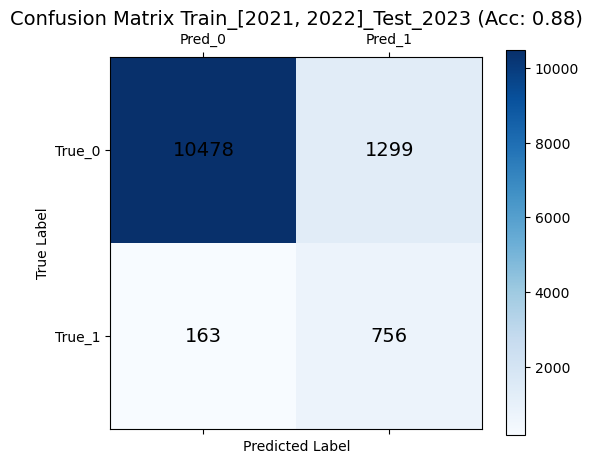


--- Training Model 2: Train Years [2021, 2023] → Test Year 2022 ---
Training RandomForestClassifier...

Accuracy: 0.8448
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90     12411
           1       0.93      0.47      0.62      4687

    accuracy                           0.84     17098
   macro avg       0.88      0.73      0.76     17098
weighted avg       0.86      0.84      0.83     17098


Confusion Matrix for Train_[2021, 2023]_Test_2022:
[[12254   157]
 [ 2497  2190]]


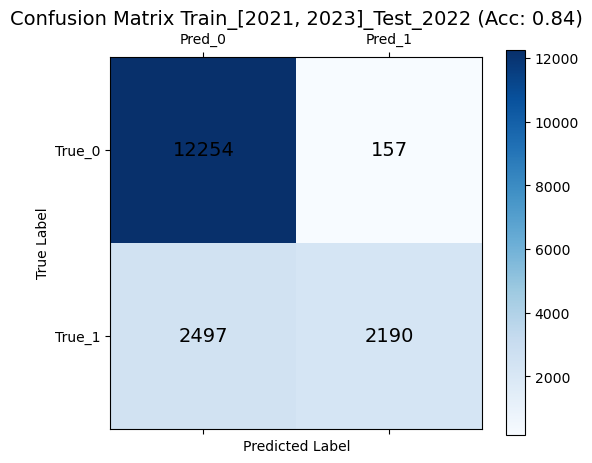


--- Training Model 3: Train Years [2022, 2023] → Test Year 2021 ---
Training RandomForestClassifier...

Accuracy: 0.8958
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2883
           1       0.59      0.58      0.59       419

    accuracy                           0.90      3302
   macro avg       0.77      0.76      0.76      3302
weighted avg       0.90      0.90      0.90      3302


Confusion Matrix for Train_[2022, 2023]_Test_2021:
[[2713  170]
 [ 174  245]]


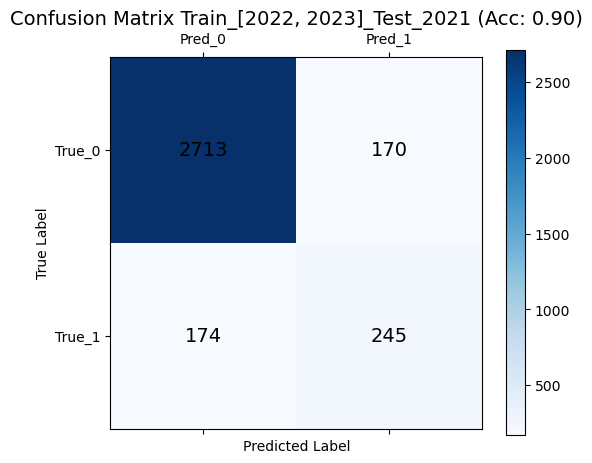


--- Overall Metrics Across All Splits ---
Accuracy: 0.8652
Precision: 0.8566
Recall: 0.8652
F1-Score: 0.8592


{'Accuracy': 0.8652405124486343,
 'Precision': 0.8565776754178934,
 'Recall': 0.8652405124486343,
 'F1-Score': 0.8592037047644927}

In [48]:
from sklearn.ensemble import RandomForestClassifier
models = [
    RandomForestClassifier(random_state=42, max_depth=100, n_estimators=100),
    RandomForestClassifier(random_state=42, max_depth=100, n_estimators=100),
    RandomForestClassifier(random_state=42, max_depth=100, n_estimators=100)
]

target_column = 'CropType_rice'
# Call the main function
model_report(data_train, data_test, target_column, models)

# Random Forest Grid Search


--- Training Model 1: Train Years [2021, 2022] → Test Year 2023 ---
Training RandomForestClassifier with GridSearchCV...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters found: {'max_depth': 50, 'min_samples_leaf': 1, 'n_estimators': 300}

Accuracy: 0.8831
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93     11777
           1       0.37      0.83      0.51       919

    accuracy                           0.88     12696
   macro avg       0.68      0.86      0.72     12696
weighted avg       0.94      0.88      0.90     12696


Confusion Matrix for Train_[2021, 2022]_Test_2023:
[[10446  1331]
 [  153   766]]


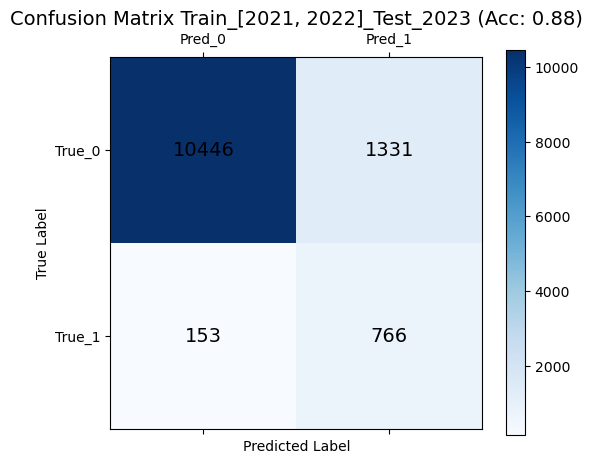


--- Training Model 2: Train Years [2021, 2023] → Test Year 2022 ---
Training RandomForestClassifier with GridSearchCV...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters found: {'max_depth': 50, 'min_samples_leaf': 1, 'n_estimators': 300}

Accuracy: 0.8452
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90     12411
           1       0.94      0.47      0.62      4687

    accuracy                           0.85     17098
   macro avg       0.88      0.73      0.76     17098
weighted avg       0.86      0.85      0.83     17098


Confusion Matrix for Train_[2021, 2023]_Test_2022:
[[12264   147]
 [ 2499  2188]]


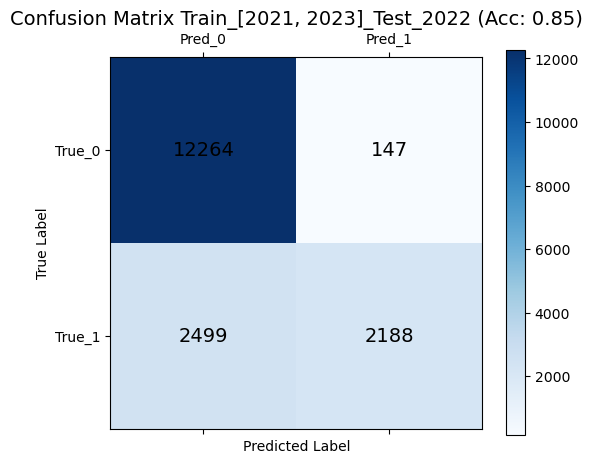


--- Training Model 3: Train Years [2022, 2023] → Test Year 2021 ---
Training RandomForestClassifier with GridSearchCV...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters found: {'max_depth': 50, 'min_samples_leaf': 1, 'n_estimators': 300}

Accuracy: 0.9001
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2883
           1       0.61      0.59      0.60       419

    accuracy                           0.90      3302
   macro avg       0.78      0.77      0.77      3302
weighted avg       0.90      0.90      0.90      3302


Confusion Matrix for Train_[2022, 2023]_Test_2021:
[[2724  159]
 [ 171  248]]


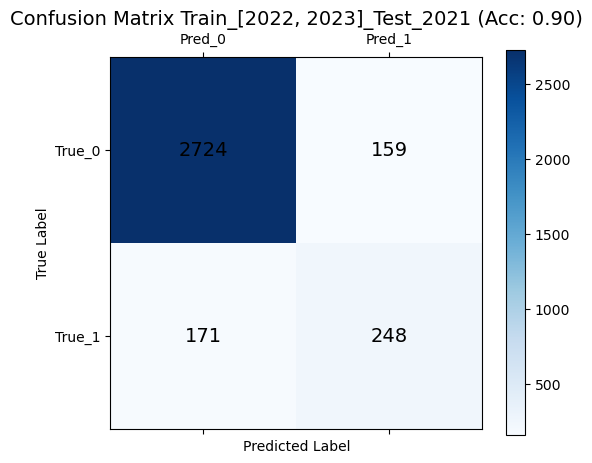


--- Overall Metrics Across All Splits ---
Accuracy: 0.8652
Precision: 0.8567
Recall: 0.8652
F1-Score: 0.8593


{'Accuracy': 0.8652405124486343,
 'Precision': 0.8566978225606423,
 'Recall': 0.8652405124486343,
 'F1-Score': 0.8593291465067368}

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import os
import re
import numpy as np

def split_data(data_train, data_test, train_years, test_year, target_col):
    """
    Splits the data into training and testing datasets based on the years.
    """
    train_data = data_train[data_train['Year'].isin(train_years)]
    test_data = data_test[data_test['Year'] == test_year]
    
    if train_data.empty or test_data.empty:
        raise ValueError("Training or testing dataset is empty. Check your year filters!")
    
    X_train = train_data.drop([target_col, 'Year'], axis=1)
    y_train = train_data[target_col]
    X_test = test_data.drop([target_col, 'Year'], axis=1)
    y_test = test_data[target_col]
    
    return X_train, y_train, X_test, y_test

def train_model_with_gridsearch(model, X_train, y_train, param_grid):
    """
    Trains a given model on the training data using GridSearchCV to tune hyperparameters.
    """
    print(f"Training {model.__class__.__name__} with GridSearchCV...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Best hyperparameters found: {grid_search.best_params_}")
    return grid_search.best_estimator_

def evaluate_model(y_test, y_pred, title="", save_plot=True):
    """
    Evaluates the model and prints metrics and confusion matrix using Matplotlib.
    """
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print confusion matrix to the console
    print(f"\nConfusion Matrix for {title}:")
    print(cm)
    
    # Plot confusion matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(6, 5))
    cax = ax.matshow(cm, cmap='Blues')  # Use the 'Blues' colormap for the background
    fig.colorbar(cax)
    
    # Annotate confusion matrix with black text
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=14)
    
    ax.set_title(f"Confusion Matrix {title} (Acc: {accuracy:.2f})", fontsize=14)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_xticks(range(cm.shape[1]))
    ax.set_yticks(range(cm.shape[0]))
    ax.set_xticklabels([f'Pred_{i}' for i in range(cm.shape[1])])
    ax.set_yticklabels([f'True_{i}' for i in range(cm.shape[0])])
    
    # Sanitize title to make it a safe filename
    safe_title = re.sub(r'\W+', '_', title)  # Replaces any non-alphanumeric characters with underscores
    
    # Ensure the file path is safe by replacing backslashes with forward slashes
    safe_title = safe_title.replace("\\", "/")
    
    if save_plot:
        # Ensure the directory exists before saving the file
        os.makedirs('plots', exist_ok=True)
        fig.savefig(f"plots/confusion_matrix_{safe_title}.png", bbox_inches='tight')
    
    plt.show()

def display_overall_metrics(y_true, y_pred):
    """
    Calculates and displays overall metrics and returns them as a dictionary.
    """
    overall_metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted')
    }
    
    print("\n--- Overall Metrics Across All Splits ---")
    for metric, value in overall_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    return overall_metrics

def model_report(data_train, data_test, target_col, models, param_grid, save_plot=True):
    """
    Main function to train and evaluate models for each split with GridSearchCV.
    """
    all_y_true = []
    all_y_pred = []

    # Define train-test splits
    splits = [
        ([2021, 2022], 2023),
        ([2021, 2023], 2022),
        ([2022, 2023], 2021)
    ]
    
    # Loop through splits and models
    for i, (train_years, test_year) in enumerate(splits):
        print(f"\n--- Training Model {i+1}: Train Years {train_years} → Test Year {test_year} ---")
        
        # Split data
        try:
            X_train, y_train, X_test, y_test = split_data(data_train, data_test, train_years, test_year, target_col)
        except ValueError as e:
            print(f"Error: {e}")
            continue
        
        # Train model with GridSearchCV
        model = models[i % len(models)]  # Support looping if fewer models than splits
        model = train_model_with_gridsearch(model, X_train, y_train, param_grid)
        
        # Predict
        y_pred = model.predict(X_test)
        
        # Evaluate model
        evaluate_model(y_test, y_pred, title=f"Train_{train_years}_Test_{test_year}", save_plot=save_plot)
        
        # Collect results for overall metrics
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)
    
    # Display overall metrics
    overall_metrics = display_overall_metrics(all_y_true, all_y_pred)
    return overall_metrics

# Define the hyperparameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 50, None],   # Maximum depth of the tree
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# List of RandomForest models
models = [
    RandomForestClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    RandomForestClassifier(random_state=42)
]

target_column = 'CropType_rice'
# Call the main function with GridSearch for model training
model_report(data_train, data_test, target_column, models, param_grid)


# XG BOOST


--- Training Model 1: Train Years [2021, 2022] → Test Year 2023 ---
Training XGBClassifier...

Accuracy: 0.8806
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     11777
           1       0.36      0.84      0.50       919

    accuracy                           0.88     12696
   macro avg       0.67      0.86      0.72     12696
weighted avg       0.94      0.88      0.90     12696


Confusion Matrix for Train_[2021, 2022]_Test_2023:
[[10409  1368]
 [  148   771]]


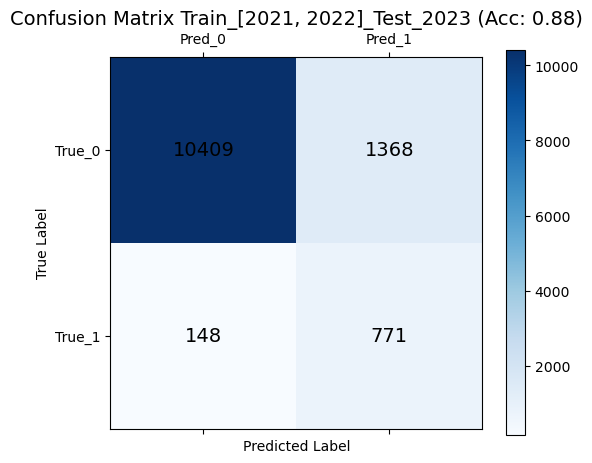


--- Training Model 2: Train Years [2021, 2023] → Test Year 2022 ---
Training XGBClassifier...

Accuracy: 0.8389
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90     12411
           1       0.89      0.47      0.61      4687

    accuracy                           0.84     17098
   macro avg       0.86      0.72      0.76     17098
weighted avg       0.85      0.84      0.82     17098


Confusion Matrix for Train_[2021, 2023]_Test_2022:
[[12150   261]
 [ 2494  2193]]


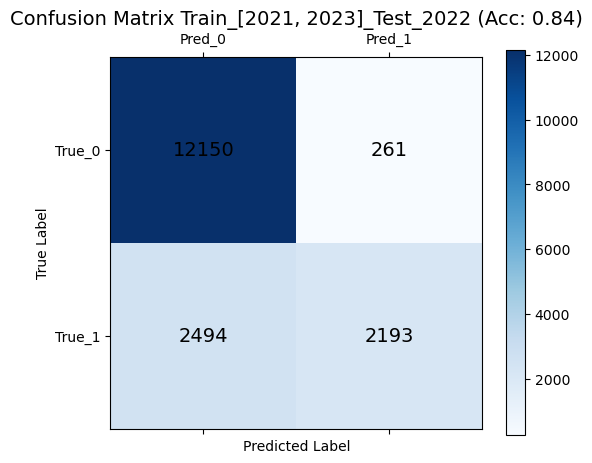


--- Training Model 3: Train Years [2022, 2023] → Test Year 2021 ---
Training XGBClassifier...

Accuracy: 0.8919
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2883
           1       0.57      0.63      0.60       419

    accuracy                           0.89      3302
   macro avg       0.76      0.78      0.77      3302
weighted avg       0.90      0.89      0.89      3302


Confusion Matrix for Train_[2022, 2023]_Test_2021:
[[2682  201]
 [ 156  263]]


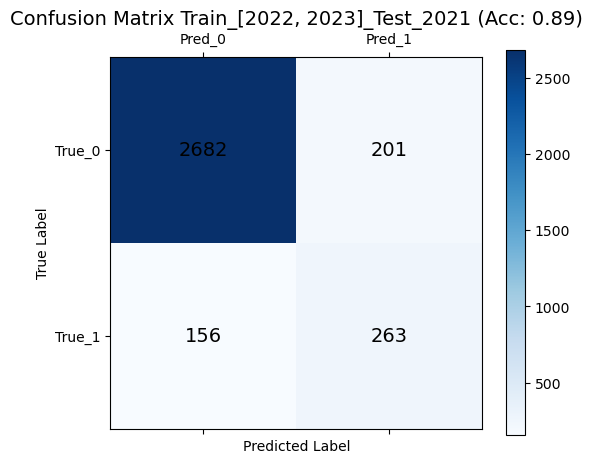


--- Overall Metrics Across All Splits ---
Accuracy: 0.8602
Precision: 0.8525
Recall: 0.8602
F1-Score: 0.8553


{'Accuracy': 0.8601643703166546,
 'Precision': 0.852498841889889,
 'Recall': 0.8601643703166546,
 'F1-Score': 0.8552852266627473}

In [49]:
import xgboost as xgb
from xgboost import XGBClassifier

# Define your models with XGBoost
models = [
    XGBClassifier(random_state=42, max_depth=100, n_estimators=100),
    XGBClassifier(random_state=42, max_depth=100, n_estimators=100),
    XGBClassifier(random_state=42, max_depth=100, n_estimators=100)
]

target_column = 'CropType_rice'

# Call the main function
model_report(data_train, data_test, target_column, models)


# XG BOOST Grid Search


--- Training Model 1: Train Years [2021, 2022] → Test Year 2023 ---
Training XGBClassifier with GridSearchCV...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

Accuracy: 0.8811
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93     11777
           1       0.36      0.83      0.50       919

    accuracy                           0.88     12696
   macro avg       0.67      0.86      0.72     12696
weighted avg       0.94      0.88      0.90     12696


Confusion Matrix for Train_[2021, 2022]_Test_2023:
[[10423  1354]
 [  156   763]]


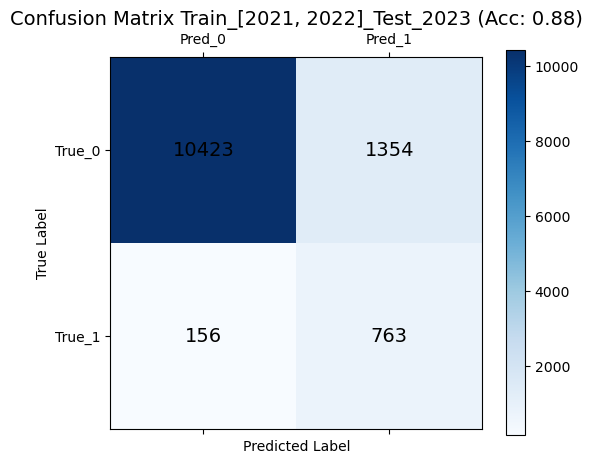


--- Training Model 2: Train Years [2021, 2023] → Test Year 2022 ---
Training XGBClassifier with GridSearchCV...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

Accuracy: 0.8390
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90     12411
           1       0.88      0.48      0.62      4687

    accuracy                           0.84     17098
   macro avg       0.86      0.73      0.76     17098
weighted avg       0.85      0.84      0.82     17098


Confusion Matrix for Train_[2021, 2023]_Test_2022:
[[12108   303]
 [ 2450  2237]]


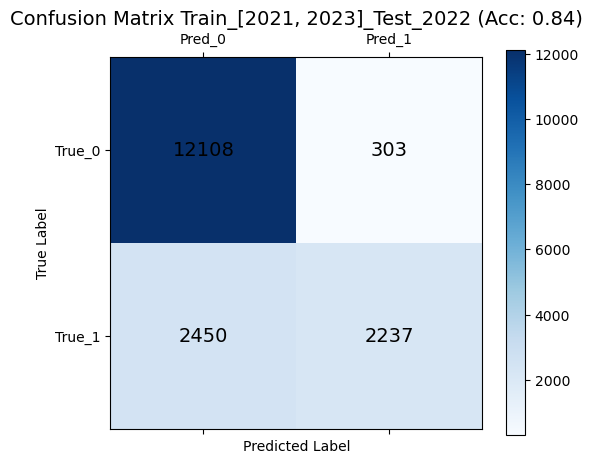


--- Training Model 3: Train Years [2022, 2023] → Test Year 2021 ---
Training XGBClassifier with GridSearchCV...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

Accuracy: 0.8949
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2883
           1       0.58      0.63      0.60       419

    accuracy                           0.89      3302
   macro avg       0.76      0.78      0.77      3302
weighted avg       0.90      0.89      0.90      3302


Confusion Matrix for Train_[2022, 2023]_Test_2021:
[[2691  192]
 [ 155  264]]


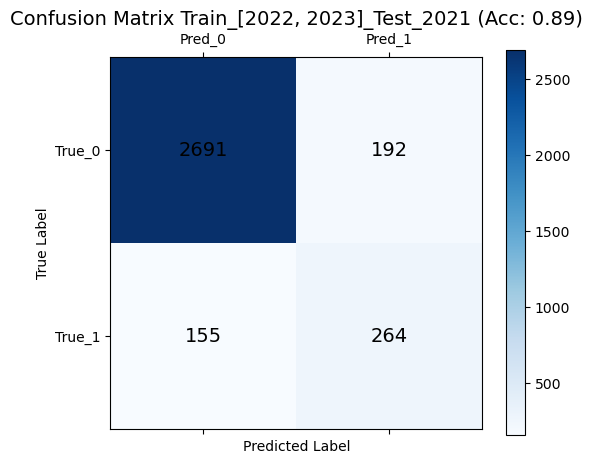


--- Overall Metrics Across All Splits ---
Accuracy: 0.8607
Precision: 0.8535
Recall: 0.8607
F1-Score: 0.8562


{'Accuracy': 0.8607082426879381,
 'Precision': 0.8534620594239126,
 'Recall': 0.8607082426879381,
 'F1-Score': 0.8561592321331774}

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import os
import re
import numpy as np

def split_data(data_train, data_test, train_years, test_year, target_col):
    """
    Splits the data into training and testing datasets based on the years.
    """
    train_data = data_train[data_train['Year'].isin(train_years)]
    test_data = data_test[data_test['Year'] == test_year]
    
    if train_data.empty or test_data.empty:
        raise ValueError("Training or testing dataset is empty. Check your year filters!")
    
    X_train = train_data.drop([target_col, 'Year'], axis=1)
    y_train = train_data[target_col]
    X_test = test_data.drop([target_col, 'Year'], axis=1)
    y_test = test_data[target_col]
    
    return X_train, y_train, X_test, y_test

def train_model_with_gridsearch(model, X_train, y_train, param_grid):
    """
    Trains a given model on the training data using GridSearchCV to tune hyperparameters.
    """
    print(f"Training {model.__class__.__name__} with GridSearchCV...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Best hyperparameters found: {grid_search.best_params_}")
    return grid_search.best_estimator_

def evaluate_model(y_test, y_pred, title="", save_plot=True):
    """
    Evaluates the model and prints metrics and confusion matrix using Matplotlib.
    """
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print confusion matrix to the console
    print(f"\nConfusion Matrix for {title}:")
    print(cm)
    
    # Plot confusion matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(6, 5))
    cax = ax.matshow(cm, cmap='Blues')  # Use the 'Blues' colormap for the background
    fig.colorbar(cax)
    
    # Annotate confusion matrix with black text
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=14)
    
    ax.set_title(f"Confusion Matrix {title} (Acc: {accuracy:.2f})", fontsize=14)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_xticks(range(cm.shape[1]))
    ax.set_yticks(range(cm.shape[0]))
    ax.set_xticklabels([f'Pred_{i}' for i in range(cm.shape[1])])
    ax.set_yticklabels([f'True_{i}' for i in range(cm.shape[0])])
    
    # Sanitize title to make it a safe filename
    safe_title = re.sub(r'\W+', '_', title)  # Replaces any non-alphanumeric characters with underscores
    
    # Ensure the file path is safe by replacing backslashes with forward slashes
    safe_title = safe_title.replace("\\", "/")
    
    if save_plot:
        # Ensure the directory exists before saving the file
        os.makedirs('plots', exist_ok=True)
        fig.savefig(f"plots/confusion_matrix_{safe_title}.png", bbox_inches='tight')
    
    plt.show()

def display_overall_metrics(y_true, y_pred):
    """
    Calculates and displays overall metrics and returns them as a dictionary.
    """
    overall_metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted')
    }
    
    print("\n--- Overall Metrics Across All Splits ---")
    for metric, value in overall_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    return overall_metrics

def model_report(data_train, data_test, target_col, models, param_grid, save_plot=True):
    """
    Main function to train and evaluate models for each split with GridSearchCV.
    """
    all_y_true = []
    all_y_pred = []

    # Define train-test splits
    splits = [
        ([2021, 2022], 2023),
        ([2021, 2023], 2022),
        ([2022, 2023], 2021)
    ]
    
    # Loop through splits and models
    for i, (train_years, test_year) in enumerate(splits):
        print(f"\n--- Training Model {i+1}: Train Years {train_years} → Test Year {test_year} ---")
        
        # Split data
        try:
            X_train, y_train, X_test, y_test = split_data(data_train, data_test, train_years, test_year, target_col)
        except ValueError as e:
            print(f"Error: {e}")
            continue
        
        # Train model with GridSearchCV
        model = models[i % len(models)]  # Support looping if fewer models than splits
        model = train_model_with_gridsearch(model, X_train, y_train, param_grid)
        
        # Predict
        y_pred = model.predict(X_test)
        
        # Evaluate model
        evaluate_model(y_test, y_pred, title=f"Train_{train_years}_Test_{test_year}", save_plot=save_plot)
        
        # Collect results for overall metrics
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)
    
    # Display overall metrics
    overall_metrics = display_overall_metrics(all_y_true, all_y_pred)
    return overall_metrics

# Define the hyperparameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate (eta)
    'max_depth': [3, 5, 7],               # Maximum depth of the tree
    'n_estimators': [100, 200, 300]      # Number of trees (estimators)
}

# List of XGBoost models
models = [
    xgb.XGBClassifier(random_state=42, n_jobs=-1),
    xgb.XGBClassifier(random_state=42, n_jobs=-1),
    xgb.XGBClassifier(random_state=42, n_jobs=-1)
]
target_column = 'CropType_rice'
# Call the main function with GridSearch for model training
model_report(data_train, data_test, target_column, models, param_grid)


# BAGGING


--- Training Model 1: Train Years [2021, 2022] → Test Year 2023 ---
Training BaggingClassifier...


/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.




Accuracy: 0.8705
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93     11777
           1       0.33      0.79      0.47       919

    accuracy                           0.87     12696
   macro avg       0.66      0.83      0.70     12696
weighted avg       0.94      0.87      0.89     12696


Confusion Matrix for Train_[2021, 2022]_Test_2023:
[[10323  1454]
 [  190   729]]


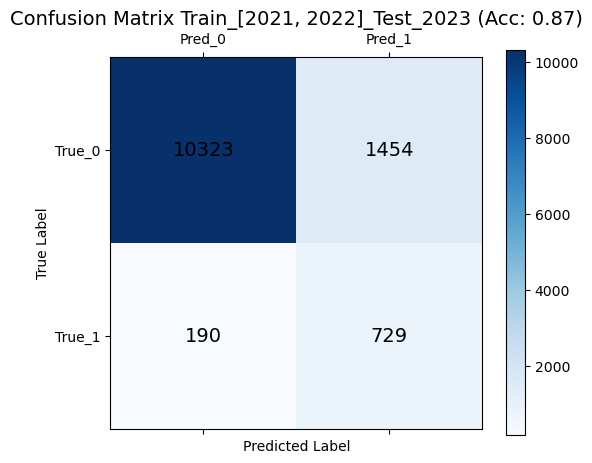


--- Training Model 2: Train Years [2021, 2023] → Test Year 2022 ---
Training BaggingClassifier...


/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.




Accuracy: 0.8245
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89     12411
           1       0.85      0.44      0.58      4687

    accuracy                           0.82     17098
   macro avg       0.83      0.70      0.73     17098
weighted avg       0.83      0.82      0.80     17098


Confusion Matrix for Train_[2021, 2023]_Test_2022:
[[12048   363]
 [ 2637  2050]]


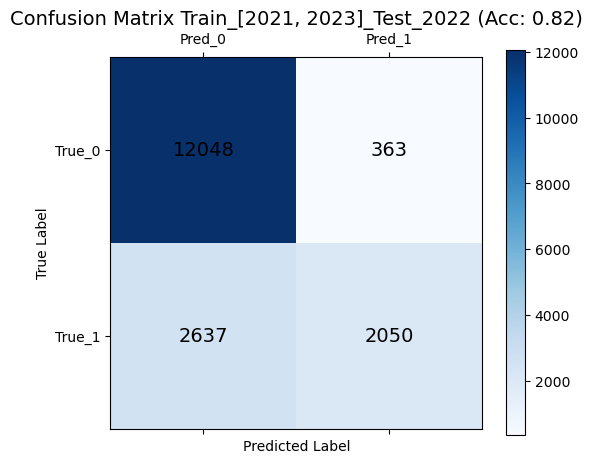


--- Training Model 3: Train Years [2022, 2023] → Test Year 2021 ---
Training BaggingClassifier...


/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.




Accuracy: 0.8552
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      2883
           1       0.45      0.62      0.52       419

    accuracy                           0.86      3302
   macro avg       0.70      0.75      0.72      3302
weighted avg       0.88      0.86      0.86      3302


Confusion Matrix for Train_[2022, 2023]_Test_2021:
[[2565  318]
 [ 160  259]]


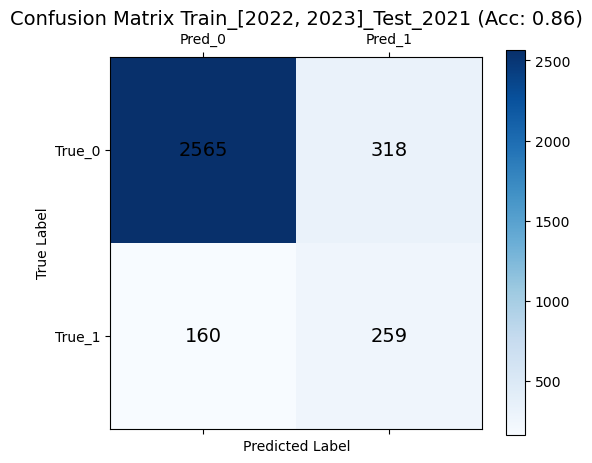


--- Overall Metrics Across All Splits ---
Accuracy: 0.8452
Precision: 0.8374
Recall: 0.8452
F1-Score: 0.8405


{'Accuracy': 0.8452380952380952,
 'Precision': 0.8373671571257824,
 'Recall': 0.8452380952380952,
 'F1-Score': 0.8405493963818311}

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define your models with Bagging using Decision Trees
models = [
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=100), random_state=42, n_estimators=100),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=100), random_state=42, n_estimators=100),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=100), random_state=42, n_estimators=100)
]

target_column = 'CropType_rice'

# Call the main function
model_report(data_train, data_test, target_column, models)


# Bagging with Grid Search



--- Training Model 1: Train Years [2021, 2022] → Test Year 2023 ---
Training BaggingClassifier with GridSearchCV...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.w

Best hyperparameters found: {'base_estimator__max_depth': 7, 'n_estimators': 200}

Accuracy: 0.8742
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93     11777
           1       0.35      0.82      0.49       919

    accuracy                           0.87     12696
   macro avg       0.67      0.85      0.71     12696
weighted avg       0.94      0.87      0.90     12696


Confusion Matrix for Train_[2021, 2022]_Test_2023:
[[10341  1436]
 [  161   758]]


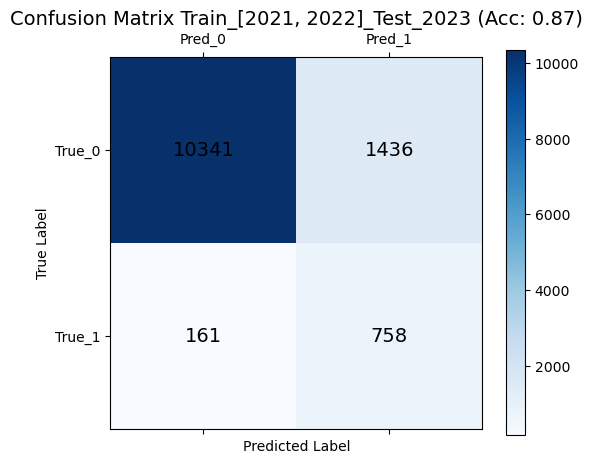


--- Training Model 2: Train Years [2021, 2023] → Test Year 2022 ---
Training BaggingClassifier with GridSearchCV...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.w

Best hyperparameters found: {'base_estimator__max_depth': 7, 'n_estimators': 100}

Accuracy: 0.8574
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     12411
           1       0.78      0.66      0.72      4687

    accuracy                           0.86     17098
   macro avg       0.83      0.80      0.81     17098
weighted avg       0.85      0.86      0.85     17098


Confusion Matrix for Train_[2021, 2023]_Test_2022:
[[11545   866]
 [ 1572  3115]]


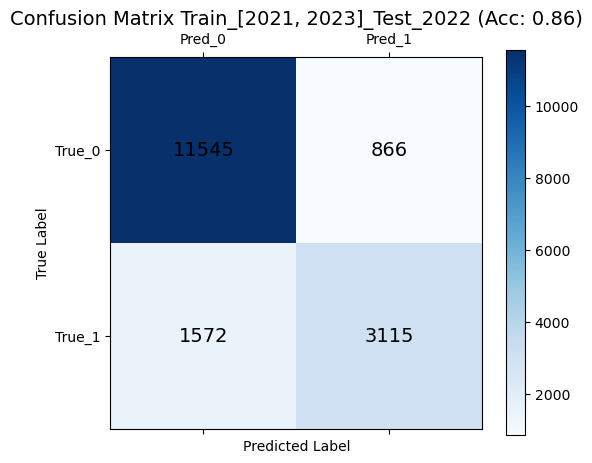


--- Training Model 3: Train Years [2022, 2023] → Test Year 2021 ---
Training BaggingClassifier with GridSearchCV...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.w

Best hyperparameters found: {'base_estimator__max_depth': 7, 'n_estimators': 200}

Accuracy: 0.8125
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.89      2883
           1       0.36      0.59      0.44       419

    accuracy                           0.81      3302
   macro avg       0.65      0.72      0.67      3302
weighted avg       0.86      0.81      0.83      3302


Confusion Matrix for Train_[2022, 2023]_Test_2021:
[[2435  448]
 [ 171  248]]


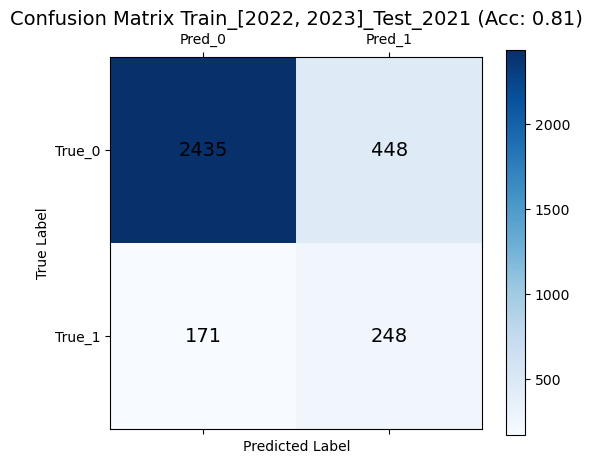


--- Overall Metrics Across All Splits ---
Accuracy: 0.8594
Precision: 0.8678
Recall: 0.8594
F1-Score: 0.8629


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import os
import re
import numpy as np

def split_data(data_train, data_test, train_years, test_year, target_col):
    """
    Splits the data into training and testing datasets based on the years.
    """
    train_data = data_train[data_train['Year'].isin(train_years)]
    test_data = data_test[data_test['Year'] == test_year]
    
    if train_data.empty or test_data.empty:
        raise ValueError("Training or testing dataset is empty. Check your year filters!")
    
    X_train = train_data.drop([target_col, 'Year'], axis=1)
    y_train = train_data[target_col]
    X_test = test_data.drop([target_col, 'Year'], axis=1)
    y_test = test_data[target_col]
    
    return X_train, y_train, X_test, y_test

def train_model_with_gridsearch(model, X_train, y_train, param_grid):
    """
    Trains a given model on the training data using GridSearchCV to tune hyperparameters.
    """
    print(f"Training {model.__class__.__name__} with GridSearchCV...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best hyperparameters found: {grid_search.best_params_}")
    return grid_search.best_estimator_

def evaluate_model(y_test, y_pred, title="", save_plot=True):
    """
    Evaluates the model and prints metrics and confusion matrix using Matplotlib.
    """
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\nConfusion Matrix for {title}:")
    print(cm)
    
    fig, ax = plt.subplots(figsize=(6, 5))
    cax = ax.matshow(cm, cmap='Blues')
    fig.colorbar(cax)
    
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=14)
    
    ax.set_title(f"Confusion Matrix {title} (Acc: {accuracy:.2f})", fontsize=14)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_xticks(range(cm.shape[1]))
    ax.set_yticks(range(cm.shape[0]))
    ax.set_xticklabels([f'Pred_{i}' for i in range(cm.shape[1])])
    ax.set_yticklabels([f'True_{i}' for i in range(cm.shape[0])])
    
    safe_title = re.sub(r'\W+', '_', title).replace("\\", "/")
    
    if save_plot:
        os.makedirs('plots', exist_ok=True)
        fig.savefig(f"plots/confusion_matrix_{safe_title}.png", bbox_inches='tight')
    
    plt.show()

def display_overall_metrics(y_true, y_pred):
    """
    Calculates and displays overall metrics and returns them as a dictionary.
    """
    overall_metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted')
    }
    
    print("\n--- Overall Metrics Across All Splits ---")
    for metric, value in overall_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    return overall_metrics

def model_report(data_train, data_test, target_col, models, param_grid, save_plot=True):
    """
    Main function to train and evaluate models for each split with GridSearchCV.
    """
    all_y_true = []
    all_y_pred = []

    # Define train-test splits
    splits = [
        ([2021, 2022], 2023),
        ([2021, 2023], 2022),
        ([2022, 2023], 2021)
    ]
    
    for i, (train_years, test_year) in enumerate(splits):
        print(f"\n--- Training Model {i+1}: Train Years {train_years} → Test Year {test_year} ---")
        
        try:
            X_train, y_train, X_test, y_test = split_data(data_train, data_test, train_years, test_year, target_col)
        except ValueError as e:
            print(f"Error: {e}")
            continue
        
        model = models[i % len(models)]
        model = train_model_with_gridsearch(model, X_train, y_train, param_grid)
        
        y_pred = model.predict(X_test)
        
        evaluate_model(y_test, y_pred, title=f"Train_{train_years}_Test_{test_year}", save_plot=save_plot)
        
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)
    
    overall_metrics = display_overall_metrics(all_y_true, all_y_pred)
    return overall_metrics

# Define the hyperparameter grid for BaggingClassifier with DecisionTreeClassifier as base estimator
param_grid = {
    'n_estimators': [50, 100, 200],
    'base_estimator__max_depth': [3, 5, 7]
}

# List of Bagging models using DecisionTreeClassifier as base estimator
models = [
    BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1, random_state=42),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1, random_state=42),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1, random_state=42)
]

# Example dataset setup (replace with your own datasets)
# data_train = pd.read_csv('path_to_train_data.csv')
# data_test = pd.read_csv('path_to_test_data.csv')

target_column = 'CropType_rice'

# Call the main function
overall_metrics = model_report(data_train, data_test, target_column, models, param_grid)


# SVM


--- Training Model 1: Train Years [2021, 2022] → Test Year 2023 ---
Training BaggingClassifier...


/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.




Accuracy: 0.8419
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91     11777
           1       0.30      0.90      0.45       919

    accuracy                           0.84     12696
   macro avg       0.65      0.87      0.68     12696
weighted avg       0.94      0.84      0.87     12696


Confusion Matrix for Train_[2021, 2022]_Test_2023:
[[9866 1911]
 [  96  823]]


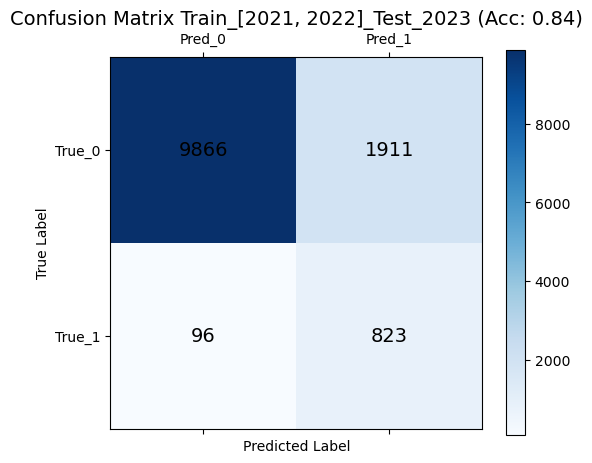


--- Training Model 2: Train Years [2021, 2023] → Test Year 2022 ---
Training BaggingClassifier...


/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.




Accuracy: 0.8900
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93     12411
           1       0.85      0.73      0.78      4687

    accuracy                           0.89     17098
   macro avg       0.88      0.84      0.85     17098
weighted avg       0.89      0.89      0.89     17098


Confusion Matrix for Train_[2021, 2023]_Test_2022:
[[11811   600]
 [ 1281  3406]]


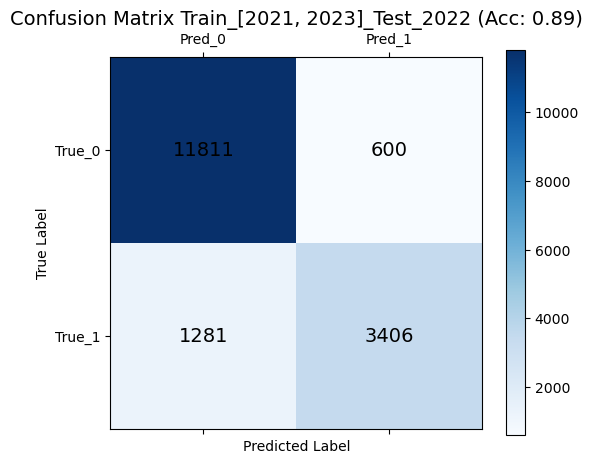


--- Training Model 3: Train Years [2022, 2023] → Test Year 2021 ---
Training BaggingClassifier...


/home/tukl/Downloads//lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.




Accuracy: 0.8922
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      2883
           1       0.56      0.72      0.63       419

    accuracy                           0.89      3302
   macro avg       0.76      0.82      0.78      3302
weighted avg       0.91      0.89      0.90      3302


Confusion Matrix for Train_[2022, 2023]_Test_2021:
[[2644  239]
 [ 117  302]]


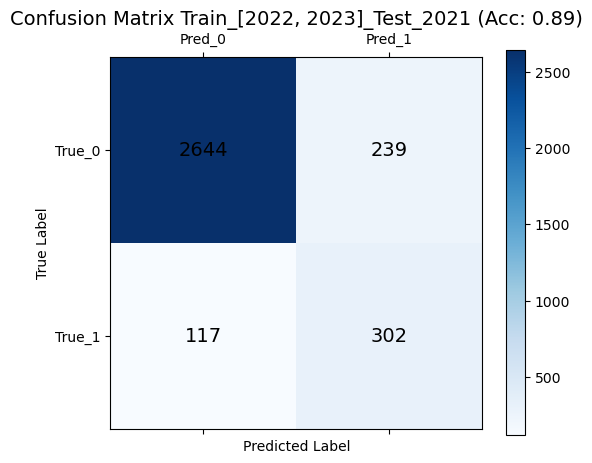


--- Overall Metrics Across All Splits ---
Accuracy: 0.8718
Precision: 0.8839
Recall: 0.8718
F1-Score: 0.8763


{'Accuracy': 0.8717669809040367,
 'Precision': 0.8839042931115976,
 'Recall': 0.8717669809040367,
 'F1-Score': 0.8762964475001559}

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

# Define your models with Bagging using non-linear SVM (RBF kernel)
models = [
    BaggingClassifier(base_estimator=SVC(kernel='rbf', random_state=42), random_state=42, n_estimators=100),
    BaggingClassifier(base_estimator=SVC(kernel='rbf', random_state=42), random_state=42, n_estimators=100),
    BaggingClassifier(base_estimator=SVC(kernel='rbf', random_state=42), random_state=42, n_estimators=100)
]

target_column = 'CropType_rice'

# Call the main function
model_report(data_train, data_test, target_column, models)


# svm Grid Search

# SVM Grid Search


--- Training Model 1: Train Years [2021, 2022] → Test Year 2023 ---
Training SVC with GridSearchCV...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters found: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Accuracy: 0.8544
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.92     11777
           1       0.31      0.85      0.46       919

    accuracy                           0.85     12696
   macro avg       0.65      0.85      0.69     12696
weighted avg       0.94      0.85      0.88     12696


Confusion Matrix for Train_[2021, 2022]_Test_2023:
[[10064  1713]
 [  136   783]]


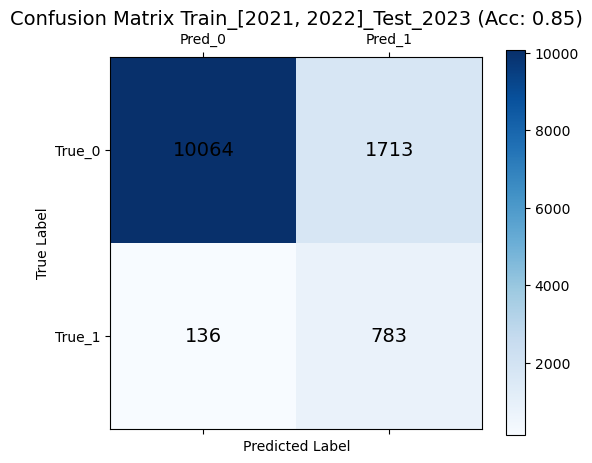


--- Training Model 2: Train Years [2021, 2023] → Test Year 2022 ---
Training SVC with GridSearchCV...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters found: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

Accuracy: 0.8144
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88     12411
           1       0.79      0.44      0.57      4687

    accuracy                           0.81     17098
   macro avg       0.80      0.70      0.72     17098
weighted avg       0.81      0.81      0.80     17098


Confusion Matrix for Train_[2021, 2023]_Test_2022:
[[11845   566]
 [ 2607  2080]]


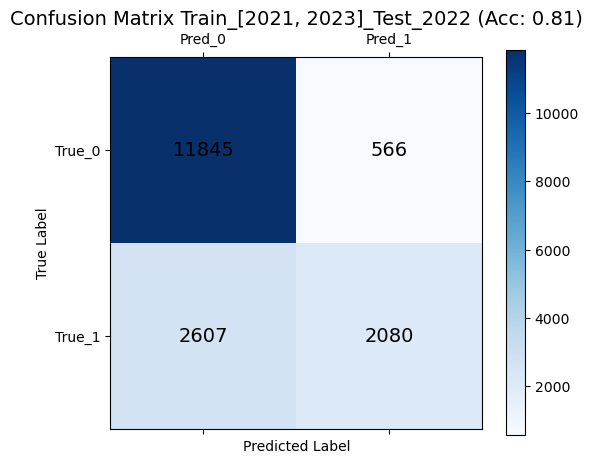


--- Training Model 3: Train Years [2022, 2023] → Test Year 2021 ---
Training SVC with GridSearchCV...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters found: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

Accuracy: 0.8886
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      2883
           1       0.55      0.64      0.59       419

    accuracy                           0.89      3302
   macro avg       0.75      0.78      0.77      3302
weighted avg       0.90      0.89      0.89      3302


Confusion Matrix for Train_[2022, 2023]_Test_2021:
[[2664  219]
 [ 149  270]]


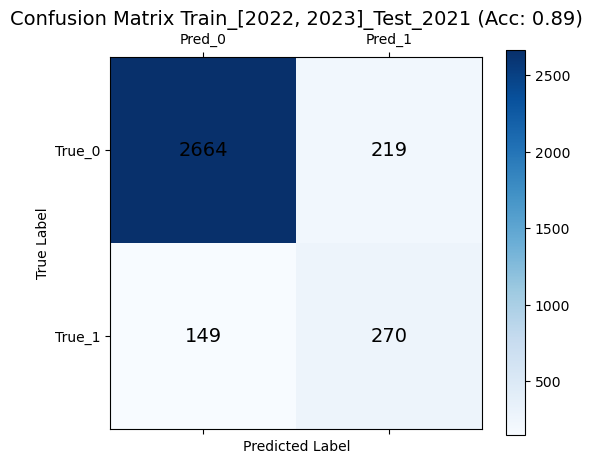


--- Overall Metrics Across All Splits ---
Accuracy: 0.8371
Precision: 0.8331
Recall: 0.8371
F1-Score: 0.8350


{'Accuracy': 0.8371404399323181,
 'Precision': 0.8331128441316796,
 'Recall': 0.8371404399323181,
 'F1-Score': 0.8349762197615478}

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import os
import re
import numpy as np

def split_data(data_train, data_test, train_years, test_year, target_col):
    """
    Splits the data into training and testing datasets based on the years.
    """
    train_data = data_train[data_train['Year'].isin(train_years)]
    test_data = data_test[data_test['Year'] == test_year]
    
    if train_data.empty or test_data.empty:
        raise ValueError("Training or testing dataset is empty. Check your year filters!")
    
    X_train = train_data.drop([target_col, 'Year'], axis=1)
    y_train = train_data[target_col]
    X_test = test_data.drop([target_col, 'Year'], axis=1)
    y_test = test_data[target_col]
    
    return X_train, y_train, X_test, y_test

def train_model_with_gridsearch(model, X_train, y_train, param_grid):
    """
    Trains a given model on the training data using GridSearchCV to tune hyperparameters.
    """
    print(f"Training {model.__class__.__name__} with GridSearchCV...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best hyperparameters found: {grid_search.best_params_}")
    return grid_search.best_estimator_

def evaluate_model(y_test, y_pred, title="", save_plot=True):
    """
    Evaluates the model and prints metrics and confusion matrix using Matplotlib.
    """
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print confusion matrix to the console
    print(f"\nConfusion Matrix for {title}:")
    print(cm)
    
    # Plot confusion matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(6, 5))
    cax = ax.matshow(cm, cmap='Blues')  # Use the 'Blues' colormap for the background
    fig.colorbar(cax)
    
    # Annotate confusion matrix with black text
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=14)
    
    ax.set_title(f"Confusion Matrix {title} (Acc: {accuracy:.2f})", fontsize=14)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_xticks(range(cm.shape[1]))
    ax.set_yticks(range(cm.shape[0]))
    ax.set_xticklabels([f'Pred_{i}' for i in range(cm.shape[1])])
    ax.set_yticklabels([f'True_{i}' for i in range(cm.shape[0])])
    
    # Sanitize title to make it a safe filename
    safe_title = re.sub(r'\W+', '_', title)  # Replaces any non-alphanumeric characters with underscores
    
    # Ensure the file path is safe by replacing backslashes with forward slashes
    safe_title = safe_title.replace("\\", "/")
    
    if save_plot:
        # Ensure the directory exists before saving the file
        os.makedirs('plots', exist_ok=True)
        fig.savefig(f"plots/confusion_matrix_{safe_title}.png", bbox_inches='tight')
    
    plt.show()

def display_overall_metrics(y_true, y_pred):
    """
    Calculates and displays overall metrics and returns them as a dictionary.
    """
    overall_metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted')
    }
    
    print("\n--- Overall Metrics Across All Splits ---")
    for metric, value in overall_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    return overall_metrics

def model_report(data_train, data_test, target_col, models, param_grid, save_plot=True):
    """
    Main function to train and evaluate models for each split with GridSearchCV.
    """
    all_y_true = []
    all_y_pred = []

    # Define train-test splits
    splits = [
        ([2021, 2022], 2023),
        ([2021, 2023], 2022),
        ([2022, 2023], 2021)
    ]
    
    # Loop through splits and models
    for i, (train_years, test_year) in enumerate(splits):
        print(f"\n--- Training Model {i+1}: Train Years {train_years} → Test Year {test_year} ---")
        
        # Split data
        try:
            X_train, y_train, X_test, y_test = split_data(data_train, data_test, train_years, test_year, target_col)
        except ValueError as e:
            print(f"Error: {e}")
            continue
        
        # Train model with GridSearchCV
        model = models[i % len(models)]  # Support looping if fewer models than splits
        model = train_model_with_gridsearch(model, X_train, y_train, param_grid)
        
        # Predict
        y_pred = model.predict(X_test)
        
        # Evaluate model
        evaluate_model(y_test, y_pred, title=f"Train_{train_years}_Test_{test_year}", save_plot=save_plot)
        
        # Collect results for overall metrics
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)
    
    # Display overall metrics
    overall_metrics = display_overall_metrics(all_y_true, all_y_pred)
    return overall_metrics

# Define the hyperparameter grid for SVC with RBF kernel
param_grid = {
    'kernel': ['rbf'],                  # Only RBF kernel
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient for 'rbf'
}

# List of SVM models (only using RBF kernel)
models = [
    SVC(random_state=42),
    SVC(random_state=42),
    SVC(random_state=42)
]

# Define the target column
target_column = 'CropType_rice'


# Call the main function with GridSearch for model training
model_report(data_train, data_test, target_column, models, param_grid)



--- Training Model 1: Train Years [2021, 2022] → Test Year 2023 ---
Training SVC with GridSearchCV...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  12.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  12.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  12.3s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  12.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  12.5s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  12.4s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  13.1s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  13.1s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  13.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  13.5s
[CV] END ................

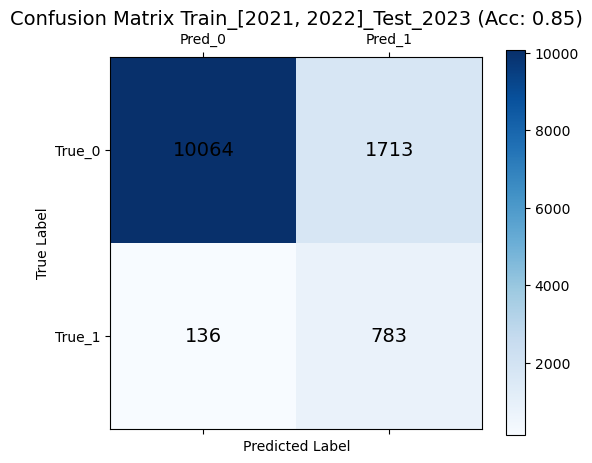


--- Training Model 2: Train Years [2021, 2023] → Test Year 2022 ---
Training SVC with GridSearchCV...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   9.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   9.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   9.6s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   9.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  10.5s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  11.1s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  11.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  12.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  13.9s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  14.2s
[CV] END ................

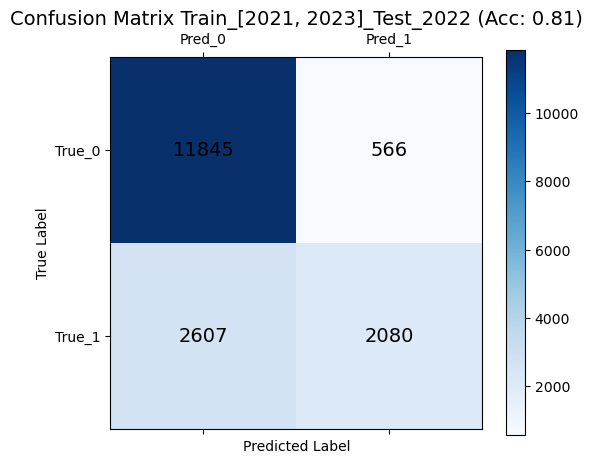


--- Training Model 3: Train Years [2022, 2023] → Test Year 2021 ---
Training SVC with GridSearchCV...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  35.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  36.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  36.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  37.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  38.9s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  39.9s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  40.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  42.2s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  42.3s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  46.2s
[CV] END ................

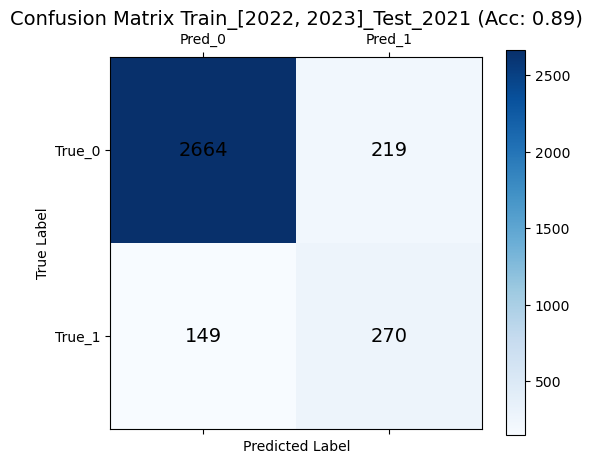


--- Overall Metrics Across All Splits ---
Accuracy: 0.8371
Precision: 0.8331
Recall: 0.8371
F1-Score: 0.8350


{'Accuracy': 0.8371404399323181,
 'Precision': 0.8331128441316796,
 'Recall': 0.8371404399323181,
 'F1-Score': 0.8349762197615478}

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import os
import re
import numpy as np

def split_data(data_train, data_test, train_years, test_year, target_col):
    """
    Splits the data into training and testing datasets based on the years.
    """
    train_data = data_train[data_train['Year'].isin(train_years)]
    test_data = data_test[data_test['Year'] == test_year]
    
    if train_data.empty or test_data.empty:
        raise ValueError("Training or testing dataset is empty. Check your year filters!")
    
    X_train = train_data.drop([target_col, 'Year'], axis=1)
    y_train = train_data[target_col]
    X_test = test_data.drop([target_col, 'Year'], axis=1)
    y_test = test_data[target_col]
    
    return X_train, y_train, X_test, y_test

def train_model_with_gridsearch(model, X_train, y_train, param_grid):
    """
    Trains a given model on the training data using GridSearchCV to tune hyperparameters.
    """
    print(f"Training {model.__class__.__name__} with GridSearchCV...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1  # Use all CPU cores
    )
    grid_search.fit(X_train, y_train)
    print(f"Best hyperparameters found: {grid_search.best_params_}")
    return grid_search.best_estimator_

def evaluate_model(y_test, y_pred, title="", save_plot=True):
    """
    Evaluates the model and prints metrics and confusion matrix using Matplotlib.
    """
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print confusion matrix to the console
    print(f"\nConfusion Matrix for {title}:")
    print(cm)
    
    # Plot confusion matrix using Matplotlib
    fig, ax = plt.subplots(figsize=(6, 5))
    cax = ax.matshow(cm, cmap='Blues')  # Use the 'Blues' colormap for the background
    fig.colorbar(cax)
    
    # Annotate confusion matrix with black text
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black', fontsize=14)
    
    ax.set_title(f"Confusion Matrix {title} (Acc: {accuracy:.2f})", fontsize=14)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_xticks(range(cm.shape[1]))
    ax.set_yticks(range(cm.shape[0]))
    ax.set_xticklabels([f'Pred_{i}' for i in range(cm.shape[1])])
    ax.set_yticklabels([f'True_{i}' for i in range(cm.shape[0])])
    
    # Sanitize title to make it a safe filename
    safe_title = re.sub(r'\W+', '_', title)  # Replaces any non-alphanumeric characters with underscores
    
    if save_plot:
        os.makedirs('plots', exist_ok=True)
        fig.savefig(f"plots/confusion_matrix_{safe_title}.png", bbox_inches='tight')
    
    plt.show()

def display_overall_metrics(y_true, y_pred):
    """
    Calculates and displays overall metrics and returns them as a dictionary.
    """
    overall_metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted')
    }
    
    print("\n--- Overall Metrics Across All Splits ---")
    for metric, value in overall_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    return overall_metrics

def model_report(data_train, data_test, target_col, models, param_grid, save_plot=True):
    """
    Main function to train and evaluate models for each split with GridSearchCV.
    """
    all_y_true = []
    all_y_pred = []

    # Define train-test splits
    splits = [
        ([2021, 2022], 2023),
        ([2021, 2023], 2022),
        ([2022, 2023], 2021)
    ]
    
    # Loop through splits and models
    for i, (train_years, test_year) in enumerate(splits):
        print(f"\n--- Training Model {i+1}: Train Years {train_years} → Test Year {test_year} ---")
        
        # Split data
        try:
            X_train, y_train, X_test, y_test = split_data(data_train, data_test, train_years, test_year, target_col)
        except ValueError as e:
            print(f"Error: {e}")
            continue
        
        # Train model with GridSearchCV
        model = models[i % len(models)]  # Support looping if fewer models than splits
        model = train_model_with_gridsearch(model, X_train, y_train, param_grid)
        
        # Predict
        y_pred = model.predict(X_test)
        
        # Evaluate model
        evaluate_model(y_test, y_pred, title=f"Train_{train_years}_Test_{test_year}", save_plot=save_plot)
        
        # Collect results for overall metrics
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)
    
    # Display overall metrics
    overall_metrics = display_overall_metrics(all_y_true, all_y_pred)
    return overall_metrics

# Extensive hyperparameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10, 100],                # Regularization parameter
    'kernel': ['rbf', 'poly'],        # Kernel types
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],    # Kernel coefficient
                        # Degree for polynomial kernel
}

# List of SVM models
models = [
    SVC(random_state=42),
    SVC(random_state=42),
    SVC(random_state=42)
]

# Define the target column
target_column = 'CropType_rice'

# Call the main function with GridSearch for model training
model_report(data_train, data_test, target_column, models, param_grid)
